# Criptografia com Códigos Corretores de Erros (Exemplos)

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Playground" data-toc-modified-id="Playground-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Playground</a></span></li><li><span><a href="#Decodificação-por-conjunto-de-informação" data-toc-modified-id="Decodificação-por-conjunto-de-informação-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Decodificação por conjunto de informação</a></span></li><li><span><a href="#McEliece-Original" data-toc-modified-id="McEliece-Original-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>McEliece Original</a></span></li><li><span><a href="#QC-MDPC" data-toc-modified-id="QC-MDPC-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>QC-MDPC</a></span></li></ul></div>

## Playground

In [203]:
G = random_matrix(GF(2), 10, 30)

In [204]:
G

[0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0]
[0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1]
[0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0]
[0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0]
[0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0]
[1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1]
[1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0]
[0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1]

In [205]:
G.row_space()

Vector space of degree 30 and dimension 10 over Finite Field of size 2
Basis matrix:
[1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1]
[0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0]
[0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0]
[0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1]
[0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1]
[0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1]
[0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0]

In [207]:
m = random_vector(GF(2), 10)
m

(0, 1, 0, 1, 1, 0, 1, 1, 1, 0)

In [209]:
m*G = c

In [210]:
G.solve_left(c)

(0, 1, 0, 1, 1, 0, 1, 1, 1, 0)

In [213]:
H = G.right_kernel().matrix()

In [222]:
G

[0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0]
[0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1]
[0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0]
[0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0]
[0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0]
[1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1]
[1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0]
[0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1]

In [224]:
print(H.T)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0]
[0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0

In [226]:
print(H)
print(c)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1]
[0 0 0 0

In [230]:
print(H*c.column())

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


## Decodificação por conjunto de informação

In [129]:
k, n = 20, 100
error_weight = 5

G = random_matrix(GF(2), k, n)
m = random_vector(GF(2), k)
c = m*G
e = gen_random_vector_with_fixed_weight(n, error_weight)
ciphertext = m*G+ e

In [130]:
ciphertext + c

(0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [162]:
def decode_using_information_set(G, ciphertext, max_error_weight):
    k, n = G.dimensions()
    
    print(k, n)
    found = False
    ntest = 0
    
    possible_indexes = list(range(n))
    while not found:
        ntest += 1
        
        information_set_candidate = sample(possible_indexes, k)
        G_is = G.matrix_from_columns(information_set_candidate)
        c_is = vector([ciphertext[i] for i in information_set_candidate])
        
        try:
            message = G_is.solve_left(c_is)
        
        
            # Testando se achou a solução
            nerrors = len((message*G + ciphertext).support())
        
            print('[*] Test ', ntest, ': nerrors = ', nerrors)

            if (nerrors <= max_error_weight):
                return (m, nerrors, information_set_candidate, ntest)
        
        # Matrix não é inversível
        except ValueError:
            print('[*] Test ', ntest, ': matrix is singular')

In [163]:
decode_using_information_set(G, ciphertext, error_weight)

20 100
[*] Test  1 : nerrors =  47
[*] Test  2 : matrix is singular
[*] Test  3 : nerrors =  5


((1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0),
 5,
 [10,
  96,
  89,
  49,
  79,
  4,
  16,
  23,
  62,
  72,
  14,
  58,
  15,
  44,
  46,
  91,
  20,
  57,
  87,
  52],
 3)

In [190]:
def test_information_set_decoding():
    
    data = {
        'k': [],
        'n': [],
        'e': [],
        'iters': [],
    }
    
    for k in range(100, 251, 25):
    
        print('================== Testing ', k, '======================')

        for _ in range(10):
            n = 5*k
            error_weight = k//10
            print(n, k, error_weight)
            G = random_matrix(GF(2), k, n)
            m = random_vector(GF(2), k)
            e = gen_random_vector_with_fixed_weight(n, error_weight)
            ciphertext = m*G+ e

            print(len(ciphertext))
            
            dec_info = decode_using_information_set(G, ciphertext, error_weight)
    
            data['k'].append(k)
            data['n'].append(n)
            data['e'].append(error_weight)
            data['iters'].append(dec_info[-1])
    return data

In [191]:
data = test_information_set_decoding()

================== Testing  100 ======================
500 100 10
500
100 500
[*] Test  1 : nerrors =  178
[*] Test  2 : matrix is singular
[*] Test  3 : matrix is singular
[*] Test  4 : matrix is singular
[*] Test  5 : matrix is singular
[*] Test  6 : nerrors =  210
[*] Test  7 : nerrors =  189
[*] Test  8 : nerrors =  194
[*] Test  9 : nerrors =  239
[*] Test  10 : nerrors =  198
[*] Test  11 : nerrors =  204
[*] Test  12 : matrix is singular
[*] Test  13 : nerrors =  192
[*] Test  14 : matrix is singular
[*] Test  15 : matrix is singular
[*] Test  16 : matrix is singular
[*] Test  17 : nerrors =  193
[*] Test  18 : matrix is singular
[*] Test  19 : nerrors =  202
[*] Test  20 : nerrors =  213
[*] Test  21 : nerrors =  10
500 100 10
500
100 500
[*] Test  1 : nerrors =  10
500 100 10
500
100 500
[*] Test  1 : matrix is singular
[*] Test  2 : matrix is singular
[*] Test  3 : matrix is singular
[*] Test  4 : matrix is singular
[*] Test  5 : nerrors =  196
[*] Test  6 : nerrors =  191
[*

[*] Test  2 : nerrors =  244
[*] Test  3 : matrix is singular
[*] Test  4 : nerrors =  253
[*] Test  5 : matrix is singular
[*] Test  6 : matrix is singular
[*] Test  7 : nerrors =  252
[*] Test  8 : nerrors =  265
[*] Test  9 : matrix is singular
[*] Test  10 : matrix is singular
[*] Test  11 : nerrors =  250
[*] Test  12 : matrix is singular
[*] Test  13 : nerrors =  12
625 125 12
625
125 625
[*] Test  1 : nerrors =  236
[*] Test  2 : nerrors =  253
[*] Test  3 : matrix is singular
[*] Test  4 : nerrors =  264
[*] Test  5 : nerrors =  264
[*] Test  6 : matrix is singular
[*] Test  7 : matrix is singular
[*] Test  8 : nerrors =  220
[*] Test  9 : matrix is singular
[*] Test  10 : matrix is singular
[*] Test  11 : matrix is singular
[*] Test  12 : nerrors =  254
[*] Test  13 : nerrors =  256
[*] Test  14 : matrix is singular
[*] Test  15 : nerrors =  255
[*] Test  16 : nerrors =  239
[*] Test  17 : matrix is singular
[*] Test  18 : matrix is singular
[*] Test  19 : nerrors =  254
[*] T

[*] Test  127 : matrix is singular
[*] Test  128 : nerrors =  306
[*] Test  129 : matrix is singular
[*] Test  130 : nerrors =  293
[*] Test  131 : nerrors =  296
[*] Test  132 : matrix is singular
[*] Test  133 : matrix is singular
[*] Test  134 : matrix is singular
[*] Test  135 : nerrors =  281
[*] Test  136 : nerrors =  301
[*] Test  137 : matrix is singular
[*] Test  138 : nerrors =  309
[*] Test  139 : nerrors =  301
[*] Test  140 : nerrors =  299
[*] Test  141 : nerrors =  318
[*] Test  142 : matrix is singular
[*] Test  143 : nerrors =  289
[*] Test  144 : nerrors =  323
[*] Test  145 : matrix is singular
[*] Test  146 : nerrors =  318
[*] Test  147 : nerrors =  319
[*] Test  148 : matrix is singular
[*] Test  149 : nerrors =  312
[*] Test  150 : matrix is singular
[*] Test  151 : nerrors =  283
[*] Test  152 : matrix is singular
[*] Test  153 : nerrors =  292
[*] Test  154 : matrix is singular
[*] Test  155 : nerrors =  307
[*] Test  156 : nerrors =  291
[*] Test  157 : nerror

[*] Test  12 : matrix is singular
[*] Test  13 : nerrors =  284
[*] Test  14 : nerrors =  308
[*] Test  15 : matrix is singular
[*] Test  16 : nerrors =  297
[*] Test  17 : nerrors =  296
[*] Test  18 : matrix is singular
[*] Test  19 : matrix is singular
[*] Test  20 : nerrors =  304
[*] Test  21 : matrix is singular
[*] Test  22 : nerrors =  305
[*] Test  23 : nerrors =  310
[*] Test  24 : nerrors =  287
[*] Test  25 : matrix is singular
[*] Test  26 : nerrors =  310
[*] Test  27 : nerrors =  310
[*] Test  28 : matrix is singular
[*] Test  29 : nerrors =  278
[*] Test  30 : nerrors =  289
[*] Test  31 : matrix is singular
[*] Test  32 : matrix is singular
[*] Test  33 : matrix is singular
[*] Test  34 : nerrors =  293
[*] Test  35 : matrix is singular
[*] Test  36 : nerrors =  15
750 150 15
750
150 750
[*] Test  1 : matrix is singular
[*] Test  2 : matrix is singular
[*] Test  3 : matrix is singular
[*] Test  4 : nerrors =  315
[*] Test  5 : nerrors =  318
[*] Test  6 : nerrors =  30

[*] Test  52 : nerrors =  280
[*] Test  53 : matrix is singular
[*] Test  54 : matrix is singular
[*] Test  55 : matrix is singular
[*] Test  56 : nerrors =  297
[*] Test  57 : nerrors =  310
[*] Test  58 : nerrors =  294
[*] Test  59 : matrix is singular
[*] Test  60 : matrix is singular
[*] Test  61 : matrix is singular
[*] Test  62 : matrix is singular
[*] Test  63 : nerrors =  278
[*] Test  64 : matrix is singular
[*] Test  65 : nerrors =  305
[*] Test  66 : matrix is singular
[*] Test  67 : nerrors =  305
[*] Test  68 : nerrors =  314
[*] Test  69 : nerrors =  304
[*] Test  70 : matrix is singular
[*] Test  71 : nerrors =  282
[*] Test  72 : matrix is singular
[*] Test  73 : nerrors =  307
[*] Test  74 : nerrors =  292
[*] Test  75 : nerrors =  274
[*] Test  76 : matrix is singular
[*] Test  77 : nerrors =  318
[*] Test  78 : nerrors =  292
[*] Test  79 : nerrors =  319
[*] Test  80 : matrix is singular
[*] Test  81 : nerrors =  298
[*] Test  82 : nerrors =  284
[*] Test  83 : mat

[*] Test  186 : nerrors =  329
[*] Test  187 : nerrors =  359
[*] Test  188 : nerrors =  342
[*] Test  189 : nerrors =  353
[*] Test  190 : nerrors =  354
[*] Test  191 : matrix is singular
[*] Test  192 : matrix is singular
[*] Test  193 : matrix is singular
[*] Test  194 : matrix is singular
[*] Test  195 : matrix is singular
[*] Test  196 : matrix is singular
[*] Test  197 : matrix is singular
[*] Test  198 : matrix is singular
[*] Test  199 : nerrors =  338
[*] Test  200 : matrix is singular
[*] Test  201 : nerrors =  350
[*] Test  202 : nerrors =  341
[*] Test  203 : matrix is singular
[*] Test  204 : nerrors =  342
[*] Test  205 : matrix is singular
[*] Test  206 : nerrors =  336
[*] Test  207 : nerrors =  342
[*] Test  208 : nerrors =  351
[*] Test  209 : nerrors =  341
[*] Test  210 : nerrors =  356
[*] Test  211 : matrix is singular
[*] Test  212 : nerrors =  353
[*] Test  213 : matrix is singular
[*] Test  214 : nerrors =  340
[*] Test  215 : matrix is singular
[*] Test  216 

[*] Test  5 : nerrors =  328
[*] Test  6 : nerrors =  344
[*] Test  7 : nerrors =  353
[*] Test  8 : matrix is singular
[*] Test  9 : nerrors =  351
[*] Test  10 : nerrors =  355
[*] Test  11 : matrix is singular
[*] Test  12 : matrix is singular
[*] Test  13 : matrix is singular
[*] Test  14 : matrix is singular
[*] Test  15 : nerrors =  360
[*] Test  16 : nerrors =  359
[*] Test  17 : nerrors =  345
[*] Test  18 : matrix is singular
[*] Test  19 : matrix is singular
[*] Test  20 : nerrors =  364
[*] Test  21 : nerrors =  326
[*] Test  22 : matrix is singular
[*] Test  23 : matrix is singular
[*] Test  24 : nerrors =  372
[*] Test  25 : nerrors =  400
[*] Test  26 : nerrors =  342
[*] Test  27 : nerrors =  340
[*] Test  28 : matrix is singular
[*] Test  29 : matrix is singular
[*] Test  30 : matrix is singular
[*] Test  31 : nerrors =  352
[*] Test  32 : matrix is singular
[*] Test  33 : nerrors =  336
[*] Test  34 : matrix is singular
[*] Test  35 : nerrors =  358
[*] Test  36 : matr

[*] Test  185 : matrix is singular
[*] Test  186 : nerrors =  340
[*] Test  187 : matrix is singular
[*] Test  188 : nerrors =  366
[*] Test  189 : nerrors =  357
[*] Test  190 : matrix is singular
[*] Test  191 : matrix is singular
[*] Test  192 : nerrors =  347
[*] Test  193 : nerrors =  338
[*] Test  194 : nerrors =  348
[*] Test  195 : nerrors =  352
[*] Test  196 : nerrors =  339
[*] Test  197 : nerrors =  373
[*] Test  198 : matrix is singular
[*] Test  199 : matrix is singular
[*] Test  200 : nerrors =  340
[*] Test  201 : nerrors =  332
[*] Test  202 : nerrors =  367
[*] Test  203 : nerrors =  348
[*] Test  204 : nerrors =  354
[*] Test  205 : nerrors =  336
[*] Test  206 : matrix is singular
[*] Test  207 : nerrors =  369
[*] Test  208 : matrix is singular
[*] Test  209 : nerrors =  359
[*] Test  210 : matrix is singular
[*] Test  211 : nerrors =  336
[*] Test  212 : nerrors =  344
[*] Test  213 : nerrors =  359
[*] Test  214 : nerrors =  374
[*] Test  215 : matrix is singular

[*] Test  467 : nerrors =  335
[*] Test  468 : nerrors =  331
[*] Test  469 : nerrors =  370
[*] Test  470 : nerrors =  364
[*] Test  471 : nerrors =  336
[*] Test  472 : nerrors =  370
[*] Test  473 : matrix is singular
[*] Test  474 : nerrors =  329
[*] Test  475 : nerrors =  340
[*] Test  476 : nerrors =  350
[*] Test  477 : matrix is singular
[*] Test  478 : nerrors =  336
[*] Test  479 : nerrors =  348
[*] Test  480 : nerrors =  351
[*] Test  481 : matrix is singular
[*] Test  482 : nerrors =  352
[*] Test  483 : nerrors =  372
[*] Test  484 : nerrors =  336
[*] Test  485 : nerrors =  365
[*] Test  486 : matrix is singular
[*] Test  487 : nerrors =  361
[*] Test  488 : nerrors =  17
875 175 17
875
175 875
[*] Test  1 : matrix is singular
[*] Test  2 : nerrors =  325
[*] Test  3 : nerrors =  367
[*] Test  4 : matrix is singular
[*] Test  5 : nerrors =  346
[*] Test  6 : matrix is singular
[*] Test  7 : nerrors =  360
[*] Test  8 : nerrors =  344
[*] Test  9 : matrix is singular
[*]

[*] Test  264 : nerrors =  369
[*] Test  265 : matrix is singular
[*] Test  266 : matrix is singular
[*] Test  267 : matrix is singular
[*] Test  268 : matrix is singular
[*] Test  269 : matrix is singular
[*] Test  270 : matrix is singular
[*] Test  271 : nerrors =  336
[*] Test  272 : nerrors =  332
[*] Test  273 : matrix is singular
[*] Test  274 : matrix is singular
[*] Test  275 : nerrors =  351
[*] Test  276 : matrix is singular
[*] Test  277 : nerrors =  374
[*] Test  278 : nerrors =  356
[*] Test  279 : nerrors =  329
[*] Test  280 : nerrors =  363
[*] Test  281 : nerrors =  345
[*] Test  282 : nerrors =  355
[*] Test  283 : matrix is singular
[*] Test  284 : nerrors =  345
[*] Test  285 : nerrors =  332
[*] Test  286 : matrix is singular
[*] Test  287 : nerrors =  368
[*] Test  288 : nerrors =  17
================== Testing  200 ======================
1000 200 20
1000
200 1000
[*] Test  1 : nerrors =  401
[*] Test  2 : matrix is singular
[*] Test  3 : nerrors =  388
[*] Test  

[*] Test  202 : nerrors =  398
[*] Test  203 : nerrors =  427
[*] Test  204 : nerrors =  407
[*] Test  205 : nerrors =  387
[*] Test  206 : nerrors =  421
[*] Test  207 : matrix is singular
[*] Test  208 : nerrors =  396
[*] Test  209 : matrix is singular
[*] Test  210 : nerrors =  390
[*] Test  211 : matrix is singular
[*] Test  212 : nerrors =  395
[*] Test  213 : nerrors =  406
[*] Test  214 : nerrors =  405
[*] Test  215 : matrix is singular
[*] Test  216 : nerrors =  387
[*] Test  217 : matrix is singular
[*] Test  218 : nerrors =  397
[*] Test  219 : nerrors =  405
[*] Test  220 : nerrors =  410
[*] Test  221 : nerrors =  403
[*] Test  222 : nerrors =  397
[*] Test  223 : nerrors =  390
[*] Test  224 : matrix is singular
[*] Test  225 : matrix is singular
[*] Test  226 : nerrors =  385
[*] Test  227 : nerrors =  414
[*] Test  228 : nerrors =  389
[*] Test  229 : nerrors =  394
[*] Test  230 : nerrors =  403
[*] Test  231 : nerrors =  384
[*] Test  232 : nerrors =  382
[*] Test  2

[*] Test  481 : matrix is singular
[*] Test  482 : nerrors =  403
[*] Test  483 : matrix is singular
[*] Test  484 : nerrors =  392
[*] Test  485 : nerrors =  392
[*] Test  486 : nerrors =  368
[*] Test  487 : nerrors =  390
[*] Test  488 : matrix is singular
[*] Test  489 : nerrors =  428
[*] Test  490 : nerrors =  399
[*] Test  491 : nerrors =  400
[*] Test  492 : nerrors =  383
[*] Test  493 : matrix is singular
[*] Test  494 : nerrors =  369
[*] Test  495 : nerrors =  395
[*] Test  496 : nerrors =  411
[*] Test  497 : nerrors =  404
[*] Test  498 : matrix is singular
[*] Test  499 : matrix is singular
[*] Test  500 : nerrors =  418
[*] Test  501 : nerrors =  391
[*] Test  502 : nerrors =  390
[*] Test  503 : nerrors =  380
[*] Test  504 : nerrors =  394
[*] Test  505 : matrix is singular
[*] Test  506 : matrix is singular
[*] Test  507 : nerrors =  407
[*] Test  508 : matrix is singular
[*] Test  509 : matrix is singular
[*] Test  510 : matrix is singular
[*] Test  511 : matrix is 

[*] Test  732 : nerrors =  384
[*] Test  733 : nerrors =  399
[*] Test  734 : matrix is singular
[*] Test  735 : matrix is singular
[*] Test  736 : nerrors =  418
[*] Test  737 : nerrors =  419
[*] Test  738 : nerrors =  418
[*] Test  739 : nerrors =  390
[*] Test  740 : nerrors =  391
[*] Test  741 : nerrors =  405
[*] Test  742 : nerrors =  377
[*] Test  743 : nerrors =  405
[*] Test  744 : nerrors =  375
[*] Test  745 : matrix is singular
[*] Test  746 : matrix is singular
[*] Test  747 : nerrors =  409
[*] Test  748 : matrix is singular
[*] Test  749 : nerrors =  393
[*] Test  750 : nerrors =  401
[*] Test  751 : matrix is singular
[*] Test  752 : nerrors =  412
[*] Test  753 : nerrors =  382
[*] Test  754 : nerrors =  407
[*] Test  755 : nerrors =  394
[*] Test  756 : matrix is singular
[*] Test  757 : matrix is singular
[*] Test  758 : matrix is singular
[*] Test  759 : nerrors =  378
[*] Test  760 : matrix is singular
[*] Test  761 : matrix is singular
[*] Test  762 : nerrors = 

[*] Test  149 : matrix is singular
[*] Test  150 : nerrors =  402
[*] Test  151 : nerrors =  433
[*] Test  152 : nerrors =  402
[*] Test  153 : nerrors =  411
[*] Test  154 : matrix is singular
[*] Test  155 : matrix is singular
[*] Test  156 : nerrors =  402
[*] Test  157 : matrix is singular
[*] Test  158 : matrix is singular
[*] Test  159 : nerrors =  398
[*] Test  160 : matrix is singular
[*] Test  161 : nerrors =  389
[*] Test  162 : nerrors =  396
[*] Test  163 : matrix is singular
[*] Test  164 : nerrors =  397
[*] Test  165 : nerrors =  403
[*] Test  166 : nerrors =  408
[*] Test  167 : matrix is singular
[*] Test  168 : nerrors =  404
[*] Test  169 : matrix is singular
[*] Test  170 : matrix is singular
[*] Test  171 : matrix is singular
[*] Test  172 : nerrors =  388
[*] Test  173 : matrix is singular
[*] Test  174 : nerrors =  406
[*] Test  175 : nerrors =  407
[*] Test  176 : matrix is singular
[*] Test  177 : nerrors =  400
[*] Test  178 : matrix is singular
[*] Test  179 

[*] Test  138 : matrix is singular
[*] Test  139 : nerrors =  409
[*] Test  140 : nerrors =  384
[*] Test  141 : nerrors =  410
[*] Test  142 : nerrors =  408
[*] Test  143 : matrix is singular
[*] Test  144 : matrix is singular
[*] Test  145 : matrix is singular
[*] Test  146 : nerrors =  423
[*] Test  147 : nerrors =  417
[*] Test  148 : matrix is singular
[*] Test  149 : nerrors =  415
[*] Test  150 : matrix is singular
[*] Test  151 : nerrors =  426
[*] Test  152 : matrix is singular
[*] Test  153 : nerrors =  387
[*] Test  154 : nerrors =  379
[*] Test  155 : matrix is singular
[*] Test  156 : nerrors =  399
[*] Test  157 : matrix is singular
[*] Test  158 : nerrors =  395
[*] Test  159 : nerrors =  410
[*] Test  160 : nerrors =  374
[*] Test  161 : nerrors =  406
[*] Test  162 : nerrors =  374
[*] Test  163 : nerrors =  400
[*] Test  164 : nerrors =  400
[*] Test  165 : matrix is singular
[*] Test  166 : matrix is singular
[*] Test  167 : nerrors =  398
[*] Test  168 : nerrors = 

[*] Test  129 : nerrors =  444
[*] Test  130 : nerrors =  415
[*] Test  131 : matrix is singular
[*] Test  132 : nerrors =  431
[*] Test  133 : nerrors =  456
[*] Test  134 : nerrors =  454
[*] Test  135 : nerrors =  443
[*] Test  136 : nerrors =  438
[*] Test  137 : matrix is singular
[*] Test  138 : nerrors =  459
[*] Test  139 : nerrors =  435
[*] Test  140 : nerrors =  433
[*] Test  141 : matrix is singular
[*] Test  142 : matrix is singular
[*] Test  143 : nerrors =  450
[*] Test  144 : nerrors =  454
[*] Test  145 : matrix is singular
[*] Test  146 : nerrors =  444
[*] Test  147 : nerrors =  437
[*] Test  148 : matrix is singular
[*] Test  149 : matrix is singular
[*] Test  150 : nerrors =  445
[*] Test  151 : nerrors =  470
[*] Test  152 : matrix is singular
[*] Test  153 : nerrors =  434
[*] Test  154 : nerrors =  448
[*] Test  155 : nerrors =  459
[*] Test  156 : nerrors =  456
[*] Test  157 : nerrors =  456
[*] Test  158 : nerrors =  474
[*] Test  159 : nerrors =  437
[*] Tes

[*] Test  8 : matrix is singular
[*] Test  9 : matrix is singular
[*] Test  10 : nerrors =  454
[*] Test  11 : nerrors =  443
[*] Test  12 : matrix is singular
[*] Test  13 : nerrors =  461
[*] Test  14 : nerrors =  470
[*] Test  15 : matrix is singular
[*] Test  16 : nerrors =  459
[*] Test  17 : nerrors =  457
[*] Test  18 : matrix is singular
[*] Test  19 : nerrors =  464
[*] Test  20 : nerrors =  442
[*] Test  21 : nerrors =  467
[*] Test  22 : nerrors =  465
[*] Test  23 : nerrors =  439
[*] Test  24 : nerrors =  441
[*] Test  25 : nerrors =  428
[*] Test  26 : matrix is singular
[*] Test  27 : matrix is singular
[*] Test  28 : nerrors =  468
[*] Test  29 : nerrors =  426
[*] Test  30 : nerrors =  464
[*] Test  31 : nerrors =  406
[*] Test  32 : matrix is singular
[*] Test  33 : nerrors =  432
[*] Test  34 : nerrors =  471
[*] Test  35 : nerrors =  448
[*] Test  36 : matrix is singular
[*] Test  37 : matrix is singular
[*] Test  38 : nerrors =  442
[*] Test  39 : nerrors =  447
[*

[*] Test  93 : matrix is singular
[*] Test  94 : nerrors =  455
[*] Test  95 : nerrors =  476
[*] Test  96 : nerrors =  454
[*] Test  97 : matrix is singular
[*] Test  98 : matrix is singular
[*] Test  99 : nerrors =  430
[*] Test  100 : nerrors =  420
[*] Test  101 : nerrors =  455
[*] Test  102 : nerrors =  473
[*] Test  103 : nerrors =  460
[*] Test  104 : matrix is singular
[*] Test  105 : nerrors =  427
[*] Test  106 : matrix is singular
[*] Test  107 : nerrors =  454
[*] Test  108 : matrix is singular
[*] Test  109 : matrix is singular
[*] Test  110 : nerrors =  463
[*] Test  111 : nerrors =  458
[*] Test  112 : nerrors =  453
[*] Test  113 : matrix is singular
[*] Test  114 : nerrors =  469
[*] Test  115 : nerrors =  430
[*] Test  116 : nerrors =  474
[*] Test  117 : nerrors =  467
[*] Test  118 : nerrors =  470
[*] Test  119 : matrix is singular
[*] Test  120 : matrix is singular
[*] Test  121 : matrix is singular
[*] Test  122 : matrix is singular
[*] Test  123 : matrix is sin

[*] Test  212 : nerrors =  454
[*] Test  213 : nerrors =  438
[*] Test  214 : nerrors =  469
[*] Test  215 : matrix is singular
[*] Test  216 : nerrors =  463
[*] Test  217 : nerrors =  454
[*] Test  218 : nerrors =  427
[*] Test  219 : nerrors =  469
[*] Test  220 : nerrors =  443
[*] Test  221 : nerrors =  451
[*] Test  222 : nerrors =  439
[*] Test  223 : matrix is singular
[*] Test  224 : nerrors =  465
[*] Test  225 : nerrors =  446
[*] Test  226 : matrix is singular
[*] Test  227 : nerrors =  440
[*] Test  228 : matrix is singular
[*] Test  229 : nerrors =  22
1125 225 22
1125
225 1125
[*] Test  1 : matrix is singular
[*] Test  2 : nerrors =  445
[*] Test  3 : matrix is singular
[*] Test  4 : nerrors =  448
[*] Test  5 : matrix is singular
[*] Test  6 : nerrors =  455
[*] Test  7 : nerrors =  435
[*] Test  8 : nerrors =  444
[*] Test  9 : matrix is singular
[*] Test  10 : matrix is singular
[*] Test  11 : nerrors =  447
[*] Test  12 : nerrors =  455
[*] Test  13 : nerrors =  434


[*] Test  183 : matrix is singular
[*] Test  184 : matrix is singular
[*] Test  185 : nerrors =  443
[*] Test  186 : nerrors =  431
[*] Test  187 : matrix is singular
[*] Test  188 : matrix is singular
[*] Test  189 : nerrors =  463
[*] Test  190 : nerrors =  464
[*] Test  191 : nerrors =  454
[*] Test  192 : nerrors =  453
[*] Test  193 : nerrors =  455
[*] Test  194 : nerrors =  431
[*] Test  195 : nerrors =  480
[*] Test  196 : nerrors =  434
[*] Test  197 : nerrors =  446
[*] Test  198 : nerrors =  435
[*] Test  199 : nerrors =  463
[*] Test  200 : matrix is singular
[*] Test  201 : nerrors =  468
[*] Test  202 : nerrors =  449
[*] Test  203 : nerrors =  457
[*] Test  204 : matrix is singular
[*] Test  205 : matrix is singular
[*] Test  206 : nerrors =  459
[*] Test  207 : matrix is singular
[*] Test  208 : nerrors =  450
[*] Test  209 : nerrors =  459
[*] Test  210 : matrix is singular
[*] Test  211 : nerrors =  461
[*] Test  212 : nerrors =  453
[*] Test  213 : nerrors =  466
[*]

[*] Test  25 : nerrors =  484
[*] Test  26 : nerrors =  497
[*] Test  27 : matrix is singular
[*] Test  28 : nerrors =  500
[*] Test  29 : nerrors =  531
[*] Test  30 : nerrors =  506
[*] Test  31 : matrix is singular
[*] Test  32 : nerrors =  514
[*] Test  33 : nerrors =  518
[*] Test  34 : matrix is singular
[*] Test  35 : nerrors =  502
[*] Test  36 : nerrors =  459
[*] Test  37 : nerrors =  511
[*] Test  38 : nerrors =  515
[*] Test  39 : nerrors =  521
[*] Test  40 : matrix is singular
[*] Test  41 : matrix is singular
[*] Test  42 : nerrors =  510
[*] Test  43 : matrix is singular
[*] Test  44 : nerrors =  521
[*] Test  45 : nerrors =  497
[*] Test  46 : nerrors =  494
[*] Test  47 : matrix is singular
[*] Test  48 : nerrors =  525
[*] Test  49 : matrix is singular
[*] Test  50 : nerrors =  534
[*] Test  51 : matrix is singular
[*] Test  52 : nerrors =  490
[*] Test  53 : matrix is singular
[*] Test  54 : matrix is singular
[*] Test  55 : nerrors =  506
[*] Test  56 : nerrors =  

[*] Test  296 : nerrors =  508
[*] Test  297 : nerrors =  483
[*] Test  298 : nerrors =  522
[*] Test  299 : matrix is singular
[*] Test  300 : nerrors =  502
[*] Test  301 : matrix is singular
[*] Test  302 : matrix is singular
[*] Test  303 : matrix is singular
[*] Test  304 : nerrors =  515
[*] Test  305 : matrix is singular
[*] Test  306 : matrix is singular
[*] Test  307 : matrix is singular
[*] Test  308 : nerrors =  524
[*] Test  309 : nerrors =  511
[*] Test  310 : nerrors =  487
[*] Test  311 : nerrors =  474
[*] Test  312 : nerrors =  515
[*] Test  313 : matrix is singular
[*] Test  314 : nerrors =  513
[*] Test  315 : matrix is singular
[*] Test  316 : nerrors =  468
[*] Test  317 : nerrors =  506
[*] Test  318 : nerrors =  467
[*] Test  319 : nerrors =  507
[*] Test  320 : matrix is singular
[*] Test  321 : nerrors =  469
[*] Test  322 : nerrors =  509
[*] Test  323 : matrix is singular
[*] Test  324 : matrix is singular
[*] Test  325 : nerrors =  510
[*] Test  326 : matrix

[*] Test  569 : matrix is singular
[*] Test  570 : matrix is singular
[*] Test  571 : nerrors =  484
[*] Test  572 : nerrors =  484
[*] Test  573 : nerrors =  478
[*] Test  574 : nerrors =  495
[*] Test  575 : matrix is singular
[*] Test  576 : nerrors =  493
[*] Test  577 : nerrors =  518
[*] Test  578 : nerrors =  490
[*] Test  579 : nerrors =  501
[*] Test  580 : nerrors =  496
[*] Test  581 : matrix is singular
[*] Test  582 : matrix is singular
[*] Test  583 : nerrors =  484
[*] Test  584 : nerrors =  517
[*] Test  585 : matrix is singular
[*] Test  586 : nerrors =  504
[*] Test  587 : nerrors =  526
[*] Test  588 : matrix is singular
[*] Test  589 : matrix is singular
[*] Test  590 : nerrors =  494
[*] Test  591 : matrix is singular
[*] Test  592 : matrix is singular
[*] Test  593 : nerrors =  487
[*] Test  594 : matrix is singular
[*] Test  595 : nerrors =  511
[*] Test  596 : nerrors =  499
[*] Test  597 : matrix is singular
[*] Test  598 : nerrors =  501
[*] Test  599 : nerror

[*] Test  846 : nerrors =  521
[*] Test  847 : nerrors =  494
[*] Test  848 : matrix is singular
[*] Test  849 : nerrors =  510
[*] Test  850 : nerrors =  487
[*] Test  851 : matrix is singular
[*] Test  852 : nerrors =  493
[*] Test  853 : nerrors =  502
[*] Test  854 : matrix is singular
[*] Test  855 : matrix is singular
[*] Test  856 : nerrors =  503
[*] Test  857 : nerrors =  483
[*] Test  858 : nerrors =  532
[*] Test  859 : matrix is singular
[*] Test  860 : matrix is singular
[*] Test  861 : nerrors =  508
[*] Test  862 : nerrors =  466
[*] Test  863 : nerrors =  491
[*] Test  864 : nerrors =  478
[*] Test  865 : nerrors =  489
[*] Test  866 : nerrors =  487
[*] Test  867 : matrix is singular
[*] Test  868 : matrix is singular
[*] Test  869 : matrix is singular
[*] Test  870 : nerrors =  505
[*] Test  871 : nerrors =  483
[*] Test  872 : nerrors =  500
[*] Test  873 : nerrors =  524
[*] Test  874 : nerrors =  487
[*] Test  875 : nerrors =  497
[*] Test  876 : matrix is singular

[*] Test  1 : nerrors =  490
[*] Test  2 : nerrors =  497
[*] Test  3 : nerrors =  487
[*] Test  4 : nerrors =  495
[*] Test  5 : matrix is singular
[*] Test  6 : nerrors =  490
[*] Test  7 : matrix is singular
[*] Test  8 : nerrors =  496
[*] Test  9 : matrix is singular
[*] Test  10 : nerrors =  486
[*] Test  11 : nerrors =  502
[*] Test  12 : nerrors =  476
[*] Test  13 : nerrors =  524
[*] Test  14 : matrix is singular
[*] Test  15 : matrix is singular
[*] Test  16 : matrix is singular
[*] Test  17 : matrix is singular
[*] Test  18 : nerrors =  491
[*] Test  19 : nerrors =  502
[*] Test  20 : matrix is singular
[*] Test  21 : matrix is singular
[*] Test  22 : nerrors =  25
1250 250 25
1250
250 1250
[*] Test  1 : matrix is singular
[*] Test  2 : nerrors =  493
[*] Test  3 : matrix is singular
[*] Test  4 : nerrors =  503
[*] Test  5 : nerrors =  496
[*] Test  6 : matrix is singular
[*] Test  7 : matrix is singular
[*] Test  8 : matrix is singular
[*] Test  9 : nerrors =  516
[*] Tes

[*] Test  53 : matrix is singular
[*] Test  54 : nerrors =  515
[*] Test  55 : nerrors =  507
[*] Test  56 : nerrors =  506
[*] Test  57 : nerrors =  470
[*] Test  58 : matrix is singular
[*] Test  59 : matrix is singular
[*] Test  60 : nerrors =  521
[*] Test  61 : nerrors =  505
[*] Test  62 : matrix is singular
[*] Test  63 : nerrors =  483
[*] Test  64 : nerrors =  481
[*] Test  65 : nerrors =  496
[*] Test  66 : nerrors =  503
[*] Test  67 : matrix is singular
[*] Test  68 : matrix is singular
[*] Test  69 : matrix is singular
[*] Test  70 : nerrors =  484
[*] Test  71 : nerrors =  490
[*] Test  72 : nerrors =  527
[*] Test  73 : nerrors =  502
[*] Test  74 : nerrors =  526
[*] Test  75 : nerrors =  498
[*] Test  76 : matrix is singular
[*] Test  77 : nerrors =  493
[*] Test  78 : matrix is singular
[*] Test  79 : nerrors =  502
[*] Test  80 : matrix is singular
[*] Test  81 : nerrors =  480
[*] Test  82 : nerrors =  507
[*] Test  83 : matrix is singular
[*] Test  84 : matrix is s

[*] Test  333 : nerrors =  515
[*] Test  334 : matrix is singular
[*] Test  335 : matrix is singular
[*] Test  336 : nerrors =  499
[*] Test  337 : matrix is singular
[*] Test  338 : nerrors =  470
[*] Test  339 : nerrors =  492
[*] Test  340 : nerrors =  497
[*] Test  341 : matrix is singular
[*] Test  342 : nerrors =  486
[*] Test  343 : nerrors =  490
[*] Test  344 : matrix is singular
[*] Test  345 : nerrors =  498
[*] Test  346 : nerrors =  494
[*] Test  347 : matrix is singular
[*] Test  348 : matrix is singular
[*] Test  349 : nerrors =  495
[*] Test  350 : matrix is singular
[*] Test  351 : matrix is singular
[*] Test  352 : matrix is singular
[*] Test  353 : matrix is singular
[*] Test  354 : nerrors =  480
[*] Test  355 : nerrors =  522
[*] Test  356 : matrix is singular
[*] Test  357 : nerrors =  505
[*] Test  358 : nerrors =  511
[*] Test  359 : nerrors =  493
[*] Test  360 : matrix is singular
[*] Test  361 : nerrors =  527
[*] Test  362 : matrix is singular
[*] Test  363 

[*] Test  20 : matrix is singular
[*] Test  21 : nerrors =  527
[*] Test  22 : nerrors =  483
[*] Test  23 : matrix is singular
[*] Test  24 : nerrors =  509
[*] Test  25 : nerrors =  507
[*] Test  26 : nerrors =  462
[*] Test  27 : nerrors =  516
[*] Test  28 : matrix is singular
[*] Test  29 : matrix is singular
[*] Test  30 : nerrors =  509
[*] Test  31 : matrix is singular
[*] Test  32 : nerrors =  501
[*] Test  33 : matrix is singular
[*] Test  34 : matrix is singular
[*] Test  35 : nerrors =  514
[*] Test  36 : nerrors =  485
[*] Test  37 : nerrors =  476
[*] Test  38 : matrix is singular
[*] Test  39 : nerrors =  492
[*] Test  40 : nerrors =  25
1250 250 25
1250
250 1250
[*] Test  1 : nerrors =  511
[*] Test  2 : nerrors =  489
[*] Test  3 : matrix is singular
[*] Test  4 : matrix is singular
[*] Test  5 : nerrors =  493
[*] Test  6 : nerrors =  498
[*] Test  7 : matrix is singular
[*] Test  8 : nerrors =  501
[*] Test  9 : matrix is singular
[*] Test  10 : nerrors =  530
[*] Te

[*] Test  90 : matrix is singular
[*] Test  91 : nerrors =  505
[*] Test  92 : matrix is singular
[*] Test  93 : nerrors =  516
[*] Test  94 : nerrors =  503
[*] Test  95 : nerrors =  502
[*] Test  96 : nerrors =  507
[*] Test  97 : nerrors =  480
[*] Test  98 : nerrors =  499
[*] Test  99 : nerrors =  524
[*] Test  100 : nerrors =  509
[*] Test  101 : nerrors =  487
[*] Test  102 : matrix is singular
[*] Test  103 : nerrors =  487
[*] Test  104 : matrix is singular
[*] Test  105 : matrix is singular
[*] Test  106 : nerrors =  494
[*] Test  107 : nerrors =  518
[*] Test  108 : nerrors =  482
[*] Test  109 : nerrors =  478
[*] Test  110 : matrix is singular
[*] Test  111 : matrix is singular
[*] Test  112 : matrix is singular
[*] Test  113 : nerrors =  512
[*] Test  114 : nerrors =  519
[*] Test  115 : matrix is singular
[*] Test  116 : nerrors =  483
[*] Test  117 : nerrors =  496
[*] Test  118 : matrix is singular
[*] Test  119 : nerrors =  498
[*] Test  120 : nerrors =  497
[*] Test 

[*] Test  111 : nerrors =  499
[*] Test  112 : nerrors =  478
[*] Test  113 : nerrors =  484
[*] Test  114 : nerrors =  502
[*] Test  115 : matrix is singular
[*] Test  116 : nerrors =  502
[*] Test  117 : nerrors =  527
[*] Test  118 : matrix is singular
[*] Test  119 : nerrors =  509
[*] Test  120 : matrix is singular
[*] Test  121 : nerrors =  534
[*] Test  122 : nerrors =  486
[*] Test  123 : nerrors =  479
[*] Test  124 : nerrors =  489
[*] Test  125 : nerrors =  498
[*] Test  126 : nerrors =  491
[*] Test  127 : nerrors =  475
[*] Test  128 : nerrors =  492
[*] Test  129 : matrix is singular
[*] Test  130 : matrix is singular
[*] Test  131 : matrix is singular
[*] Test  132 : nerrors =  499
[*] Test  133 : nerrors =  485
[*] Test  134 : matrix is singular
[*] Test  135 : nerrors =  515
[*] Test  136 : matrix is singular
[*] Test  137 : nerrors =  501
[*] Test  138 : nerrors =  494
[*] Test  139 : nerrors =  507
[*] Test  140 : matrix is singular
[*] Test  141 : nerrors =  493
[*]

[*] Test  390 : matrix is singular
[*] Test  391 : nerrors =  491
[*] Test  392 : nerrors =  508
[*] Test  393 : matrix is singular
[*] Test  394 : nerrors =  497
[*] Test  395 : nerrors =  494
[*] Test  396 : nerrors =  503
[*] Test  397 : matrix is singular
[*] Test  398 : nerrors =  519
[*] Test  399 : matrix is singular
[*] Test  400 : nerrors =  479
[*] Test  401 : nerrors =  519
[*] Test  402 : matrix is singular
[*] Test  403 : matrix is singular
[*] Test  404 : matrix is singular
[*] Test  405 : matrix is singular
[*] Test  406 : matrix is singular
[*] Test  407 : nerrors =  486
[*] Test  408 : nerrors =  484
[*] Test  409 : matrix is singular
[*] Test  410 : nerrors =  495
[*] Test  411 : matrix is singular
[*] Test  412 : matrix is singular
[*] Test  413 : nerrors =  514
[*] Test  414 : nerrors =  503
[*] Test  415 : matrix is singular
[*] Test  416 : nerrors =  489
[*] Test  417 : nerrors =  497
[*] Test  418 : nerrors =  499
[*] Test  419 : matrix is singular
[*] Test  420 

[*] Test  656 : matrix is singular
[*] Test  657 : matrix is singular
[*] Test  658 : nerrors =  518
[*] Test  659 : nerrors =  487
[*] Test  660 : nerrors =  496
[*] Test  661 : matrix is singular
[*] Test  662 : nerrors =  505
[*] Test  663 : nerrors =  514
[*] Test  664 : matrix is singular
[*] Test  665 : nerrors =  503
[*] Test  666 : nerrors =  500
[*] Test  667 : nerrors =  474
[*] Test  668 : nerrors =  500
[*] Test  669 : matrix is singular
[*] Test  670 : nerrors =  482
[*] Test  671 : matrix is singular
[*] Test  672 : nerrors =  499
[*] Test  673 : matrix is singular
[*] Test  674 : matrix is singular
[*] Test  675 : nerrors =  492
[*] Test  676 : matrix is singular
[*] Test  677 : matrix is singular
[*] Test  678 : matrix is singular
[*] Test  679 : matrix is singular
[*] Test  680 : nerrors =  458
[*] Test  681 : nerrors =  495
[*] Test  682 : matrix is singular
[*] Test  683 : nerrors =  509
[*] Test  684 : nerrors =  481
[*] Test  685 : nerrors =  498
[*] Test  686 : ne

[*] Test  916 : nerrors =  523
[*] Test  917 : matrix is singular
[*] Test  918 : nerrors =  509
[*] Test  919 : matrix is singular
[*] Test  920 : matrix is singular
[*] Test  921 : nerrors =  469
[*] Test  922 : matrix is singular
[*] Test  923 : nerrors =  499
[*] Test  924 : nerrors =  533
[*] Test  925 : matrix is singular
[*] Test  926 : matrix is singular
[*] Test  927 : nerrors =  532
[*] Test  928 : matrix is singular
[*] Test  929 : nerrors =  509
[*] Test  930 : nerrors =  508
[*] Test  931 : nerrors =  511
[*] Test  932 : matrix is singular
[*] Test  933 : matrix is singular
[*] Test  934 : matrix is singular
[*] Test  935 : nerrors =  492
[*] Test  936 : nerrors =  490
[*] Test  937 : nerrors =  482
[*] Test  938 : nerrors =  485
[*] Test  939 : matrix is singular
[*] Test  940 : nerrors =  461
[*] Test  941 : matrix is singular
[*] Test  942 : nerrors =  510
[*] Test  943 : matrix is singular
[*] Test  944 : matrix is singular
[*] Test  945 : nerrors =  509
[*] Test  946 

In [193]:
import pandas as pd
info_set_data = pd.DataFrame.from_dict(data)


In [194]:
info_set_data

,k,n,e,iters
0,100,500,10,21
1,100,500,10,1
2,100,500,10,50
3,100,500,10,19
4,100,500,10,20
...,...,...,...,...
65,250,1250,25,568
66,250,1250,25,40
67,250,1250,25,171
68,250,1250,25,249


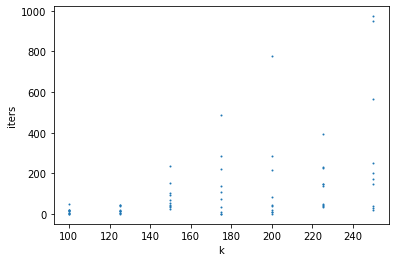

In [199]:
info_set_data.plot.scatter(x='k', y='iters', s=1)

## McEliece Original

In [232]:
from sage.all import *

import random


class GoppaCode:

    def __init__(self, message_size, field_exponent, max_errors):
        self.message_size = message_size
        self.coeffs_field_exponent = field_exponent
        self.max_errors = max_errors
        self.code_size = message_size + field_exponent*max_errors

        self.coeffs_space = GF(2**field_exponent, 'z')
        self.code_space = PolynomialRing(self.coeffs_space, 'x')
        self.code_var = self.code_space.gen()

        self.support = list(self.coeffs_space)

        self.goppa_poly = self.code_space.irreducible_element(max_errors)

        self.check_matrix = self.gen_parity_check_matrix()
        self.generator_matrix = self.gen_generator_matrix()

    @property
    def deg(self):
        return self.max_errors

    def gen_parity_check_matrix(self):
        vandermonde = matrix(self.coeffs_space, [[c**i for c in self.support]
                             for i in range(self.deg)])

        diag = diagonal_matrix(self.coeffs_space, [1/self.goppa_poly(c)
                               for c in self.support])

        check_matrix_gf2m = vandermonde*diag

        check_matrix = matrix(GF(2), self.code_size - self.message_size,
                              self.code_size)
        for i in range(self.deg):
            for j in range(self.code_size):
                pol = check_matrix_gf2m[i, j].polynomial()
                for q in range(self.coeffs_field_exponent):
                    check_matrix[i*self.coeffs_field_exponent + q, j] = pol[q]

        return check_matrix

    def gen_generator_matrix(self):
        generator_matrix = self.check_matrix.right_kernel().basis_matrix()

        return generator_matrix

    def get_syndrome_poly(self, word):
        x = self.code_var

        synd = self.code_space(0)
        for i, c in enumerate(word[0]):
            synd += c*(x - self.support[i]).inverse_mod(self.goppa_poly)

        return synd

    def encode(self, message):
        return message*self.generator_matrix

    def decode(self, received):
        return self.decode_by_patterson(received)

    def split_even_odd(self, poly):
        coeffs = list(poly)

        even_component = [sqrt(c) for c in coeffs[0::2]]
        odd_component = [sqrt(c) for c in coeffs[1::2]]

        return (poly.parent(even_component), poly.parent(odd_component))

    def inverse_code_var(self):
        g_even, g_odd = self.split_even_odd(self.goppa_poly)

        return g_even*g_odd.inverse_mod(self.goppa_poly)

    def get_poly_sqrt(self, poly):
        g_even, g_odd = self.split_even_odd(self.goppa_poly)
        inv_code_var = self.inverse_code_var()

        coeffs = list(poly)
        var = poly.variables()[0]

        even_part, odd_part = self.split_even_odd(poly)

        return poly.parent(even_part) + inv_code_var*poly.parent(odd_part)

    def get_error_locator_by_patterson(self, word):
        synd = self.get_syndrome_poly(word)

        if synd.mod(self.goppa_poly) == 0:
            return (word, 0)

        inv_synd = synd.inverse_mod(self.goppa_poly)
        tau = self.get_poly_sqrt(inv_synd + self.code_var).mod(self.goppa_poly)

        i = GF(2)(0)
        sigma_even = [tau, self.goppa_poly]
        sigma_odd = [1, 0]

        max_degree = self.deg/2
        # sigma_even[0] = tau*sigma_odd[0]
        while sigma_even[i].degree() > max_degree:
            i += 1
            q, sigma_even[i] = sigma_even[i - 2].quo_rem(sigma_even[i - 1])
            sigma_odd[i] = sigma_odd[i - 2] + q*sigma_odd[i - 1]
            # invariant: sigma_even[i] = tau*sigma_odd[i]

        return sigma_even[i]**2 + self.code_var*(sigma_odd[i]**2)

    def decode_by_patterson(self, word):
        error_locator = self.get_error_locator_by_patterson(word)
        error = GF(2)(1)

        codeword = []
        for w, s in zip(word[0], self.support):
            if error_locator(s).is_zero():
                codeword.append(w + error)
            else:
                codeword.append(w)

        return Matrix(codeword)


class McElieceSystem:

    def __init__(self, plain_size, code_field_exp, no_errors, scrambling=True):
        self.code = GoppaCode(plain_size, code_field_exp, no_errors)

        self.no_errors = no_errors
        self.plain_size = plain_size
        self.cipher_size = self.code.code_size

        if scrambling:
            self.permutation = Permutations(self.cipher_size).random_element()
            self.non_sing_matrix = random_matrix(GF(2), self.plain_size,
                                                 algorithm='unimodular')

        else:
            self.permutation = Permutations(self.cipher_size).identity()
            self.non_sing_matrix = identity_matrix(self.plain_size)

    def get_private_key(self):
        system_matrix = self.non_sing_matrix * self.code.generator_matrix

        return (system_matrix, self.code.decode, self.permutation)

    def get_public_key(self):
        pub_matrix = (self.non_sing_matrix * self.code.generator_matrix *
                      self.permutation.to_matrix())

        return (pub_matrix, self.no_errors)

    def get_priv_and_pub_keys(self):
        return (self.get_private_key(), self.get_public_key())


class PublicKeyHolder:

    def __init__(self, generator_matrix, no_errors):
        self.generator_matrix = generator_matrix
        self.no_errors = no_errors

    def encrypt(self, plain_text):
        encoded = plain_text*self.generator_matrix
        print('encoded (no errors):\n', vstr(encoded))
        error_locations = random.sample(range(encoded.ncols()), self.no_errors)

        cipher_text = [e for e in encoded[0]]
        for location in error_locations:
            cipher_text[location] += 1

        return Matrix(cipher_text)


class PrivateKeyHolder:

    def __init__(self, system_matrix, fast_decode, permutation):
        self.system_matrix = system_matrix
        self.fast_decode = fast_decode
        self.permutation = permutation

    def decrypt(self, cipher_text):
        disturbed_codeword = cipher_text*self.permutation.inverse().to_matrix()
        decoded = self.fast_decode(disturbed_codeword)
        message = self.system_matrix.solve_left(decoded)

        return message

In [233]:
def vstr(vector_as_mat):
    out = ''
    for v in vector_as_mat[0]:
        if v == 1:
            out += '1'
        else:
            out += '.'
    return out

In [234]:

n, m, t, k = 64, 6, 4, 40
GF2 = GF(2)

mceliece_system = McElieceSystem(k, m, t, scrambling=True)

alice = PublicKeyHolder(*mceliece_system.get_public_key())
bob = PrivateKeyHolder(*mceliece_system.get_private_key())

message = Matrix([GF2.random_element() for i in range(k)])
print('message\n', vstr(message))
ciphertext = alice.encrypt(message)
print('ciphertext\n', vstr(ciphertext))
plaintext = bob.decrypt(ciphertext)
print('plaintext\n', vstr(plaintext))


message
 111111.11.11.......11.1.11111...1111..1.
encoded (no errors):
 .1..1...111.1...1....1.111.1..11.1...111.1111111...1...1.....1.1
ciphertext
 .1..1...111.1...1....1.11..1.111.....111.1111111.......1.....1.1
plaintext
 111111.11.11.......11.1.11111...1111..1.


## QC-MDPC

In [13]:
from __future__ import division

import matplotlib.pyplot as plt

from random import choice
from collections import defaultdict

def get_quasi_cyclic_matrix(line, no_blocks):
    block_lenght = len(line) // no_blocks
    blocks_lines = [line[i*block_lenght:(i+1)*block_lenght] for i in
                    range(no_blocks)]
    blocks_matrices = [get_cyclic_matrix(line) for line in blocks_lines]

    check_matrix = [[] for _ in range(block_lenght)]

    for block in blocks_matrices:
        for i, _ in enumerate(check_matrix):
            check_matrix[i] += block[i]

    return check_matrix


def sparse_square(n, prob):
    M = []
    for i in range(n):
        M.append([])
        for j in range(n):
            if (random() <= prob):
                M[-1].append(1)
            else:
                M[-1].append(0)
        if sum(M[-1]) == 0:
            M[-1][randrange(n)] = 1

    return matrix(GF(2), M)

def bicirculant(signature):
    M = []
    for i in range(len(signature)):
        if i % 2 == 0:
            M.append(signature[-i:] + signature[:-i])
        else:
            M.append(signature[i:] + signature[:i])

    return M

def sparse_qc(n, weight):
    line = [1]*weight + (n - weight)*[0]
    shuffle(line)
    M = []
    for i in range(n):
        M.append([])
        for c in range(-i, -i+n):
            M[-1].append(line[c])
    return matrix(GF(2), M)

def plot_matrix(matrix):
    import seaborn as sns
    import pandas as pd

    M = []
    for l in matrix:
        M.append([])
        for i in l:
            M[-1].append(int(i))
    df = pd.DataFrame(data=M)
    hm = sns.heatmap(df, square=False, xticklabels=[], linewidths=1,
                     cbar=False, yticklabels=[])
    plt.show()


def comb_choice(sample_list, n):
    sample = set()
    while len(sample) < n:
        sample.add(choice(sample_list))
    return list(sample)


def gen_random_vector_with_fixed_weight(size, weight):
    indexes = list(range(size))
    shuffle(indexes)
    avector = [0 for _ in range(size)]
    for i in indexes[:weight]:
        avector[i] = 1

    return vector(avector)

def gen_random_list_with_fixed_weight(size, weight):
    indexes = range(size)
    shuffle(indexes)
    vector = [0 for _ in range(size)]
    for i in indexes[:weight]:
        vector[i] = 1

    return vector


def get_cyclic_matrix(vector):
    return [vector[-i:] + vector[:-i] for i in range(len(vector))]


def mat_get_cyclic_matrix(vector):
    return matrix(GF(2), len(vector), len(vector),
        lambda i, j: vector[(-i + j) % len(vector)])


def gen_cyclic_matrix(size, weight):
    avector = gen_random_vector_with_fixed_weight(size, weight)
    return get_cyclic_matrix(avector)


def gen_invertible_cyclic_matrix(size, weight):
    matrix = matrix([0])

    print(size, weight)
    while not matrix(GF(2), matrix).is_invertible():
        matrix = gen_cyclic_matrix(size, weight)
        # print(matrix)

    return matrix


class LDPC():

    def __init__(self, check_matrix):
        print('pre')
        self.check_matrix = matrix(GF(2), check_matrix)
        print('pre')
        self.generator_matrix = self.check_matrix.right_kernel_matrix()
        print('ok')

        self.check_nodes = [(i, 'c%d' % i)
                            for i in range(self.check_matrix.nrows())]
        self.variable_nodes = [(i, 'v%d' % i)
                               for i in range(self.check_matrix.ncols())]
        self.check_adjacencies = defaultdict(list)
        self.var_adjacencies = defaultdict(list)
        for check_node, line in zip(self.check_nodes, self.check_matrix):
            for variable_node, entry in zip(self.variable_nodes, line):
                if entry == 1:
                    self.check_adjacencies[check_node[0]].append(variable_node)
                    self.var_adjacencies[variable_node[0]].append(check_node)

    def check_neighbors(self, i):
        return self.check_adjacencies[i]

    def var_neighbors(self, j):
        return self.var_adjacencies[j]

    @staticmethod
    def gen_random_regular_column_code(column_weight, message_length):
        code_length = 2*message_length
        check_matrix = [[0] * code_length for _ in range(message_length)]
        possible_lines = range(message_length)
        for j in range(code_length):
            for i in comb_choice(possible_lines, column_weight):
                check_matrix[i - 1][j] = 1

        return LDPC(check_matrix)

    @staticmethod
    def gen_random_regular_row_code(row_weight, message_length):
        code_length = 2*message_length
        check_matrix = [[0] * code_length for _ in range(message_length)]
        possible_lines = range(code_length)
        for i in range(message_length):
            for j in comb_choice(possible_lines, row_weight):
                check_matrix[i][j] = 1
            print(j)
        return LDPC(check_matrix)

    def gen_random_message(self):
        message = vector([GF(2).random_element()
                            for i in range(self.generator_matrix.nrows())])
        return message

    def plot_parity_matrix(self):
        plot_matrix(self.check_matrix)


    def gen_random_error(self, error_prob):
        error = []
        for i in range(self.generator_matrix.ncols()):
            if random() <= error_prob:
                error.append(1)
            else:
                error.append(0)
        return vector(GF(2), error)

    def encode(self, word):
        word = vector(GF(2), word)
        return word*self.generator_matrix

    def decode(self, word):
        return self.decode_by_bit_flipping(word)

    def decode_by_message_passing(self, word, error_prob, max_it=15):

        # Init
        llr_variable_nodes = []
        for value in word[0]:
            llr = (-1)**int(value)*log((1 - error_prob)/error_prob)
            llr_variable_nodes.append(llr)

        llr_msg_var_to_check = {}
        for j, var_node in self.variable_nodes:
            for i, check_node in self.var_neighbors(j):
                llr_msg_var_to_check[(j, i)] = llr_variable_nodes[j]

        print(word[0])

        # Iter
        llr_msg_check_to_var = {}
        llr_total = [0 for _ in self.variable_nodes]

        for it in range(max_it):
            for i, check_node in self.check_nodes:
                ci_neigh_prod = 1
                for j, var_node in self.check_neighbors(i):
                    ci_neigh_prod *= tanh(0.5*llr_msg_var_to_check[(j, i)])
                for j, var_node in self.check_neighbors(i):
                    extrin_prod = ci_neigh_prod/tanh(
                            0.5*llr_msg_var_to_check[(j, i)])
                    llr_msg_check_to_var[(i, j)] = 2*arctanh(extrin_prod)

            for j, var_node in self.variable_nodes:
                vi_neigh_sum = 0
                for i, check_node in self.var_neighbors(j):
                    vi_neigh_sum += llr_msg_check_to_var[(i, j)]
                for i, check_node in self.var_neighbors(j):
                    extrin_sum = vi_neigh_sum - llr_msg_check_to_var[(i, j)]
                    llr_msg_var_to_check[(j, i)] = (llr_variable_nodes[j] +
                                                    extrin_sum)
            for j, var_node in self.variable_nodes:
                llr_total[j] = 0
                for i, check_node in self.var_neighbors(j):
                    llr_total[j] += llr_msg_check_to_var[(i, j)]

            dump = []
            for v in llr_total:
                k = e**v
                dump.append(1/(1 + k))

            # print("llr_total_dump::", dump)
            print(dump)

            recovered = []
            for v in llr_total:
                # print(v)
                if v < 0:
                    recovered.append(1)
                else:
                    recovered.append(0)
            # print(recovered)
            word = Matrix(recovered)
            syndrome = (word*self.check_matrix.transpose())
            # print(syndrome)

            if 1 not in syndrome[0]:
                break

        print(word[0])
        return word

    def decode_by_gallager_b(self, word, b=3, max_it=15):

        # Init
        variable_nodes = []
        for value in word[0]:
            variable_nodes.append(value)

        msg_var_to_check = {}
        for j, var_node in self.variable_nodes:
            for i, check_node in self.var_neighbors(j):
                msg_var_to_check[(j, i)] = variable_nodes[j]

        print(word[0])

        # Iter
        msg_check_to_var = {}
        for it in range(max_it):
            for i, check_node in self.check_nodes:
                ci_neigh_sum = 0
                for j, var_node in self.check_neighbors(i):
                    ci_neigh_sum += msg_var_to_check[(j, i)]
                ci_neigh_sum %= 2
                for j, var_node in self.check_neighbors(i):
                    extrin_sum = (ci_neigh_sum - msg_var_to_check[(j, i)]) % 2
                    msg_check_to_var[(i, j)] = extrin_sum

            for j, var_node in self.variable_nodes:
                d = 0
                for i, check_node in self.var_neighbors(j):
                    d += (msg_check_to_var[(i, j)] + variable_nodes[j]) % 2
                for i, check_node in self.var_neighbors(j):
                    delta = d - (msg_check_to_var[(i, j)] + variable_nodes[j]) % 2
                    print(i, d)
                    if delta >= b:
                        msg_var_to_check[(j, i)] = (variable_nodes[j] + 1) % 2
                    else:
                        msg_var_to_check[(j, i)] = variable_nodes[j]

            recovered = []
            for j, var_node in self.variable_nodes:
                msg_set = [msg_check_to_var[(i, j)] for i, _ in
                           self.var_neighbors(j)]

                if len(msg_set) % 2 == 0:
                    msg_set.append(variable_nodes[j])
                if msg_set.count(1) > len(msg_set)/2:
                    recovered.append(1)
                else:
                    recovered.append(0)

            word = Matrix(recovered)
            syndrome = (word*self.check_matrix.transpose())
            # print(syndrome)

            if 1 not in syndrome[0]:
                break

        print(word[0])
        return word

    def decode_by_bit_flipping(self, word):
        word = matrix(GF(2), word)
        syndrome = (word*self.check_matrix.transpose())
        b = 6

        # print(syndrome)
        words = []
        while 1 in syndrome[0]:

            nsat_per_bit = {}
            for i, check_node in self.check_nodes:
                if syndrome[0][i] == 0:
                    continue
                for j, var_node in self.check_neighbors(i):
                    nsat_per_bit[var_node] = 1 + nsat_per_bit.get(var_node, 0)

            flipped = []
            for i, var_node in self.variable_nodes:
                if nsat_per_bit.get(var_node, 0) >= b:
                    flipped.append(word[0][i] + 1)
                else:
                    flipped.append(word[0][i])

            words.append(flipped)

            word = Matrix(flipped)
            print(word)
            # print(nsat_per_bit)
            syndrome = (word*self.check_matrix.transpose())
            print(syndrome)

        print('nit:', len(words))
        return word

    def decode_by_rafael_bit_flipping(self, transmitted, d=0, max_it=15):
        word = vector(GF(2), transmitted)
        syndrome = self.check_matrix*word

        number_of_iterations = 0

        while 1 in syndrome and number_of_iterations < max_it:
            number_of_iterations += 1

            nsat_per_bit = {}
            for i, check_node in self.check_nodes:
                if syndrome[i] == 0:
                    continue
                for j, var_node in self.check_neighbors(i):
                    nsat_per_bit[j] = 1 + nsat_per_bit.get(j, 0)

            max_upc = max(nsat_per_bit.values())
            # print("MAXupcallowed %d = %d" % (number_of_iterations, max_upc - d))
            for j in nsat_per_bit:
                if nsat_per_bit[j] >= max_upc - d:
                    word[j] += 1

            syndrome = self.check_matrix*word

        if number_of_iterations >= max_it:
            return (None, number_of_iterations)

        return (word, number_of_iterations)


class MDPC(LDPC):

    def __init__(self, check_matrix, no_blocks):
        self.no_blocks = no_blocks
        print('pre')
        self.check_matrix = matrix(GF(2), check_matrix)
        print('gtg')
        self.generator_matrix = self.check_matrix.right_kernel_matrix()

        self.check_nodes = [(i, 'c%d' % i)
                            for i in range(self.check_matrix.nrows())]
        self.variable_nodes = [(i, 'v%d' % i)
                               for i in range(self.check_matrix.ncols())]
        self.length = len(self.variable_nodes)

        block_lenght = len(self.variable_nodes)//self.no_blocks
        blocks_lines = [self.check_matrix[0][i*block_lenght:(i+1)*block_lenght]
                        for i in range(no_blocks)]
        non_zero_positions = [[i for i, _ in enumerate(line) if line[i] == 1]
                              for line in blocks_lines]

        self.check_adjacencies = defaultdict(list)
        self.var_adjacencies = defaultdict(list)

        self.sparse_matrix = []

        print('start')
        for check_node in self.check_nodes:
            for block, non_zero_in_block in enumerate(non_zero_positions):
                base_index = block*block_lenght
                for i, index in enumerate(non_zero_in_block):
                    variable_node = self.variable_nodes[base_index + index]
                    non_zero_in_block[i] = (index + 1) % block_lenght

                    self.check_adjacencies[check_node[0]].append(variable_node)
                    self.var_adjacencies[variable_node[0]].append(check_node)

                    self.sparse_matrix.append((check_node[0],
                                              variable_node[0]))
            print(check_node)

    @staticmethod
    def gen_random_qc_mdpc(row_weight, message_length, no_blocks):
        code_length = 2*message_length
        block_lenght = message_length

        line = MDPC.gen_valid_qc_mdpc_first_line(code_length, row_weight,
                                                 no_blocks)
        blocks_lines = [line[i*block_lenght:(i+1)*block_lenght] for i in
                        range(no_blocks)]
        blocks_matrices = [get_cyclic_matrix(line) for line in blocks_lines]

        check_matrix = [[] for _ in range(message_length)]
        for block in blocks_matrices:
            for i, _ in enumerate(check_matrix):
                check_matrix[i] += block[i]
        print('done')
        return MDPC(check_matrix, no_blocks)

    @staticmethod
    def gen_qc_mdpc_given_sign(row_weight, signatures):
        if (len(signatures) != 2):
            raise IndexError

        message_length = len(signatures[0])
        code_length = 2*message_length
        block_lenght = message_length

        no_blocks = len(signatures)
        blocks_matrices = [get_cyclic_matrix(line) for line in signatures]

        check_matrix = [[] for _ in range(message_length)]
        for block in blocks_matrices:
            for i, _ in enumerate(check_matrix):
                check_matrix[i] += block[i]
        print('done')
        return MDPC(check_matrix, no_blocks)

    @staticmethod
    def gen_valid_qc_mdpc_first_line(size, weight, nblocks):
        poly_ring = PolynomialRing(GF(2), 'x')
        x = poly_ring.gen()

        def is_invertible(vec):
            poly = sum([v*x**i for i, v in enumerate(vec)])
            try:
                poly.inverse_mod(x**(size//nblocks) + 1)
                return True
            except:
                return False

        line = list(gen_random_vector_with_fixed_weight(size, weight))
        while not is_invertible(line[size//2:]):
            line = list(gen_random_vector_with_fixed_weight(size, weight))

        return line

    def get_syndrome(self, c):
        syndrome = zero_vector(GF(2), len(self.check_nodes))
        for i, j in self.sparse_matrix:
            syndrome[i] += c[j]

        return syndrome

    def get_row_weight(self):
        return list(self.check_matrix[0]).count(1)

    def dump_to_file(self, filename):
        f = open(filename, 'w')

        f.write('%d %d %d\n' % (self.length, self.check_matrix.nrows(),
                                self.get_row_weight()))
        f.write('%d\n' % self.no_blocks)

        block_size = self.length//self.no_blocks
        for i in range(self.no_blocks):
            line = self.check_matrix[0][i*block_size:(i+1)*block_size]
            ones_pos = [i for i, v in enumerate(line) if v == 1]
            f.write('%d\n' % len(ones_pos))
            for i in ones_pos:
                f.write('%d ' % i)
            f.write('\n')

        f.close()


In [25]:
mdpc = MDPC.gen_random_qc_mdpc(90, 4801, 2)


done
pre
gtg
start
(0, 'c0')
(1, 'c1')
(2, 'c2')
(3, 'c3')
(4, 'c4')
(5, 'c5')
(6, 'c6')
(7, 'c7')
(8, 'c8')
(9, 'c9')
(10, 'c10')
(11, 'c11')
(12, 'c12')
(13, 'c13')
(14, 'c14')
(15, 'c15')
(16, 'c16')
(17, 'c17')
(18, 'c18')
(19, 'c19')
(20, 'c20')
(21, 'c21')
(22, 'c22')
(23, 'c23')
(24, 'c24')
(25, 'c25')
(26, 'c26')
(27, 'c27')
(28, 'c28')
(29, 'c29')
(30, 'c30')
(31, 'c31')
(32, 'c32')
(33, 'c33')
(34, 'c34')
(35, 'c35')
(36, 'c36')
(37, 'c37')
(38, 'c38')
(39, 'c39')
(40, 'c40')
(41, 'c41')
(42, 'c42')
(43, 'c43')
(44, 'c44')
(45, 'c45')
(46, 'c46')
(47, 'c47')
(48, 'c48')
(49, 'c49')
(50, 'c50')
(51, 'c51')
(52, 'c52')
(53, 'c53')
(54, 'c54')
(55, 'c55')
(56, 'c56')
(57, 'c57')
(58, 'c58')
(59, 'c59')
(60, 'c60')
(61, 'c61')
(62, 'c62')
(63, 'c63')
(64, 'c64')
(65, 'c65')
(66, 'c66')
(67, 'c67')
(68, 'c68')
(69, 'c69')
(70, 'c70')
(71, 'c71')
(72, 'c72')
(73, 'c73')
(74, 'c74')
(75, 'c75')
(76, 'c76')
(77, 'c77')
(78, 'c78')
(79, 'c79')
(80, 'c80')
(81, 'c81')
(82, 'c82')
(83, 

(1134, 'c1134')
(1135, 'c1135')
(1136, 'c1136')
(1137, 'c1137')
(1138, 'c1138')
(1139, 'c1139')
(1140, 'c1140')
(1141, 'c1141')
(1142, 'c1142')
(1143, 'c1143')
(1144, 'c1144')
(1145, 'c1145')
(1146, 'c1146')
(1147, 'c1147')
(1148, 'c1148')
(1149, 'c1149')
(1150, 'c1150')
(1151, 'c1151')
(1152, 'c1152')
(1153, 'c1153')
(1154, 'c1154')
(1155, 'c1155')
(1156, 'c1156')
(1157, 'c1157')
(1158, 'c1158')
(1159, 'c1159')
(1160, 'c1160')
(1161, 'c1161')
(1162, 'c1162')
(1163, 'c1163')
(1164, 'c1164')
(1165, 'c1165')
(1166, 'c1166')
(1167, 'c1167')
(1168, 'c1168')
(1169, 'c1169')
(1170, 'c1170')
(1171, 'c1171')
(1172, 'c1172')
(1173, 'c1173')
(1174, 'c1174')
(1175, 'c1175')
(1176, 'c1176')
(1177, 'c1177')
(1178, 'c1178')
(1179, 'c1179')
(1180, 'c1180')
(1181, 'c1181')
(1182, 'c1182')
(1183, 'c1183')
(1184, 'c1184')
(1185, 'c1185')
(1186, 'c1186')
(1187, 'c1187')
(1188, 'c1188')
(1189, 'c1189')
(1190, 'c1190')
(1191, 'c1191')
(1192, 'c1192')
(1193, 'c1193')
(1194, 'c1194')
(1195, 'c1195')
(1196, '

(2515, 'c2515')
(2516, 'c2516')
(2517, 'c2517')
(2518, 'c2518')
(2519, 'c2519')
(2520, 'c2520')
(2521, 'c2521')
(2522, 'c2522')
(2523, 'c2523')
(2524, 'c2524')
(2525, 'c2525')
(2526, 'c2526')
(2527, 'c2527')
(2528, 'c2528')
(2529, 'c2529')
(2530, 'c2530')
(2531, 'c2531')
(2532, 'c2532')
(2533, 'c2533')
(2534, 'c2534')
(2535, 'c2535')
(2536, 'c2536')
(2537, 'c2537')
(2538, 'c2538')
(2539, 'c2539')
(2540, 'c2540')
(2541, 'c2541')
(2542, 'c2542')
(2543, 'c2543')
(2544, 'c2544')
(2545, 'c2545')
(2546, 'c2546')
(2547, 'c2547')
(2548, 'c2548')
(2549, 'c2549')
(2550, 'c2550')
(2551, 'c2551')
(2552, 'c2552')
(2553, 'c2553')
(2554, 'c2554')
(2555, 'c2555')
(2556, 'c2556')
(2557, 'c2557')
(2558, 'c2558')
(2559, 'c2559')
(2560, 'c2560')
(2561, 'c2561')
(2562, 'c2562')
(2563, 'c2563')
(2564, 'c2564')
(2565, 'c2565')
(2566, 'c2566')
(2567, 'c2567')
(2568, 'c2568')
(2569, 'c2569')
(2570, 'c2570')
(2571, 'c2571')
(2572, 'c2572')
(2573, 'c2573')
(2574, 'c2574')
(2575, 'c2575')
(2576, 'c2576')
(2577, '

(3689, 'c3689')
(3690, 'c3690')
(3691, 'c3691')
(3692, 'c3692')
(3693, 'c3693')
(3694, 'c3694')
(3695, 'c3695')
(3696, 'c3696')
(3697, 'c3697')
(3698, 'c3698')
(3699, 'c3699')
(3700, 'c3700')
(3701, 'c3701')
(3702, 'c3702')
(3703, 'c3703')
(3704, 'c3704')
(3705, 'c3705')
(3706, 'c3706')
(3707, 'c3707')
(3708, 'c3708')
(3709, 'c3709')
(3710, 'c3710')
(3711, 'c3711')
(3712, 'c3712')
(3713, 'c3713')
(3714, 'c3714')
(3715, 'c3715')
(3716, 'c3716')
(3717, 'c3717')
(3718, 'c3718')
(3719, 'c3719')
(3720, 'c3720')
(3721, 'c3721')
(3722, 'c3722')
(3723, 'c3723')
(3724, 'c3724')
(3725, 'c3725')
(3726, 'c3726')
(3727, 'c3727')
(3728, 'c3728')
(3729, 'c3729')
(3730, 'c3730')
(3731, 'c3731')
(3732, 'c3732')
(3733, 'c3733')
(3734, 'c3734')
(3735, 'c3735')
(3736, 'c3736')
(3737, 'c3737')
(3738, 'c3738')
(3739, 'c3739')
(3740, 'c3740')
(3741, 'c3741')
(3742, 'c3742')
(3743, 'c3743')
(3744, 'c3744')
(3745, 'c3745')
(3746, 'c3746')
(3747, 'c3747')
(3748, 'c3748')
(3749, 'c3749')
(3750, 'c3750')
(3751, '

(4748, 'c4748')
(4749, 'c4749')
(4750, 'c4750')
(4751, 'c4751')
(4752, 'c4752')
(4753, 'c4753')
(4754, 'c4754')
(4755, 'c4755')
(4756, 'c4756')
(4757, 'c4757')
(4758, 'c4758')
(4759, 'c4759')
(4760, 'c4760')
(4761, 'c4761')
(4762, 'c4762')
(4763, 'c4763')
(4764, 'c4764')
(4765, 'c4765')
(4766, 'c4766')
(4767, 'c4767')
(4768, 'c4768')
(4769, 'c4769')
(4770, 'c4770')
(4771, 'c4771')
(4772, 'c4772')
(4773, 'c4773')
(4774, 'c4774')
(4775, 'c4775')
(4776, 'c4776')
(4777, 'c4777')
(4778, 'c4778')
(4779, 'c4779')
(4780, 'c4780')
(4781, 'c4781')
(4782, 'c4782')
(4783, 'c4783')
(4784, 'c4784')
(4785, 'c4785')
(4786, 'c4786')
(4787, 'c4787')
(4788, 'c4788')
(4789, 'c4789')
(4790, 'c4790')
(4791, 'c4791')
(4792, 'c4792')
(4793, 'c4793')
(4794, 'c4794')
(4795, 'c4795')
(4796, 'c4796')
(4797, 'c4797')
(4798, 'c4798')
(4799, 'c4799')
(4800, 'c4800')


In [20]:
m = mdpc.gen_random_message(); 
print(m)
c= mdpc.encode(m); 
print(c)
e = gen_random_vector_with_fixed_weight(mdpc.length, 84)
t = vector(GF(2), list(c + e))
print(t)
d = mdpc.decode_by_rafael_bit_flipping(t, d=5)
print(d)

(1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 

((1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,

In [26]:
d[0] == c

True